First 5 rows of the dataset:
         Date      Open      High       Low     Close  Adj Close     Volume
0  2004-08-19  2.502503  2.604104  2.401401  2.511011   2.501941  893181924
1  2004-08-20  2.527778  2.729730  2.515015  2.710460   2.700670  456686856
2  2004-08-23  2.771522  2.839840  2.728979  2.737738   2.727849  365122512
3  2004-08-24  2.783784  2.792793  2.591842  2.624374   2.614895  304946748
4  2004-08-25  2.626627  2.702703  2.599600  2.652653   2.643072  183772044


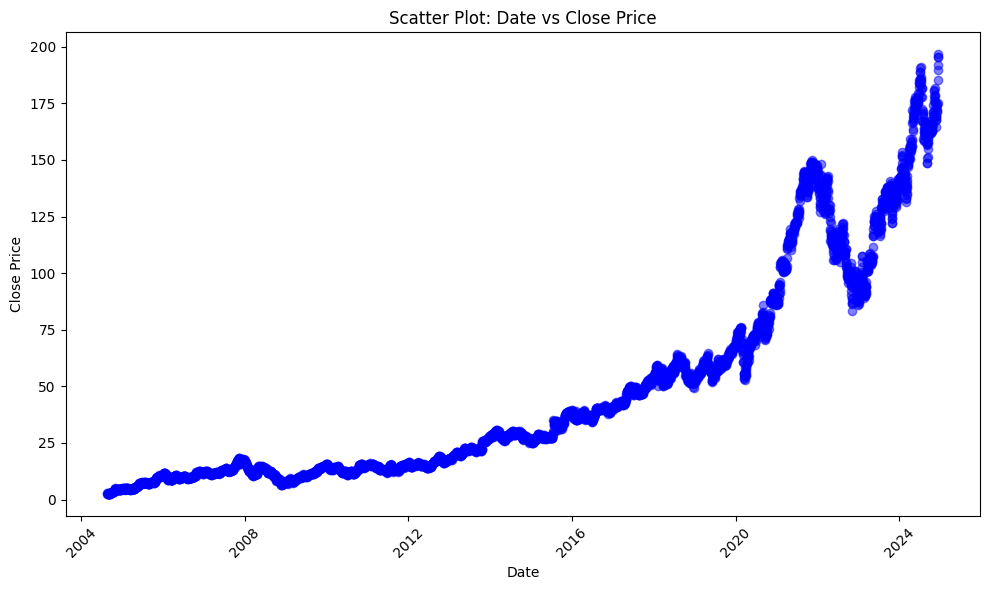

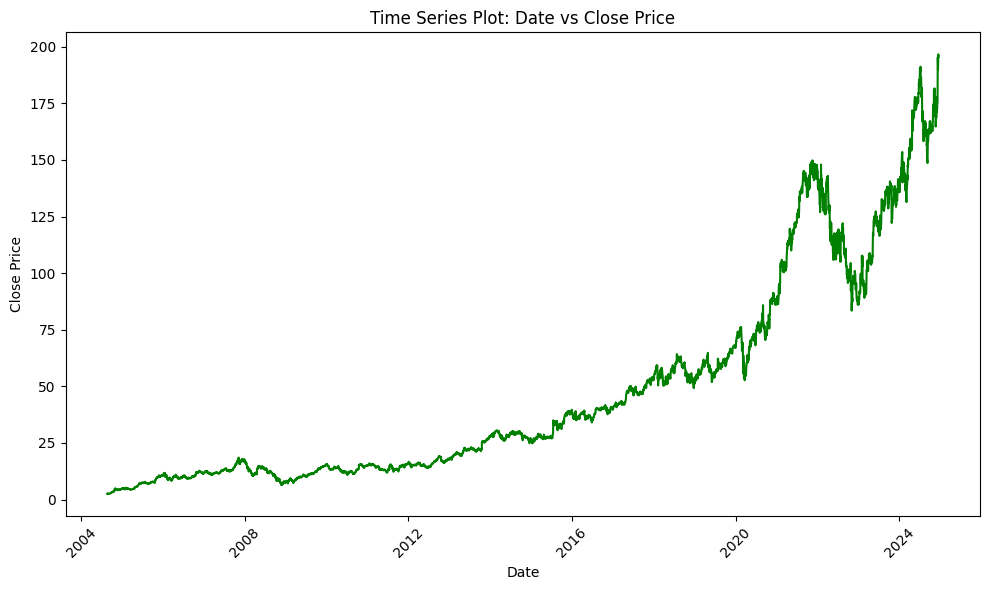

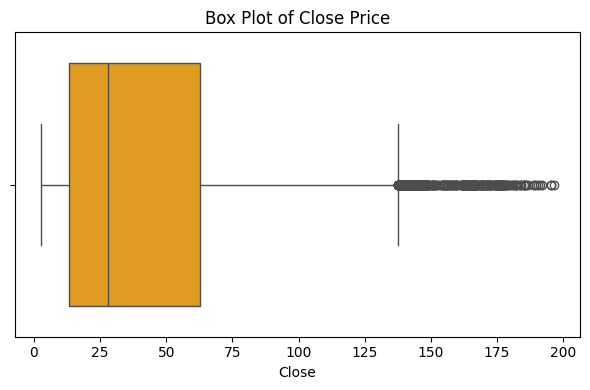

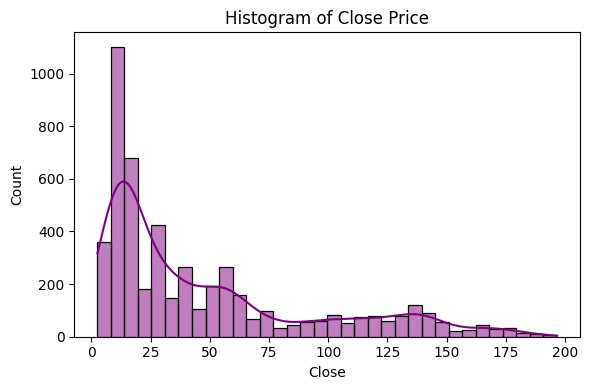


Dataset shape before outlier removal: (5118, 7)
Dataset shape after outlier removal: (4748, 7)

Model Performance (R² Score):
Linear Regression R²: 0.9999118244654129
Random Forest Regressor R²: 0.999832865153792
SVR R²: 0.997328400585822


<ipython-input-5-503dedb348ec>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette="mako")


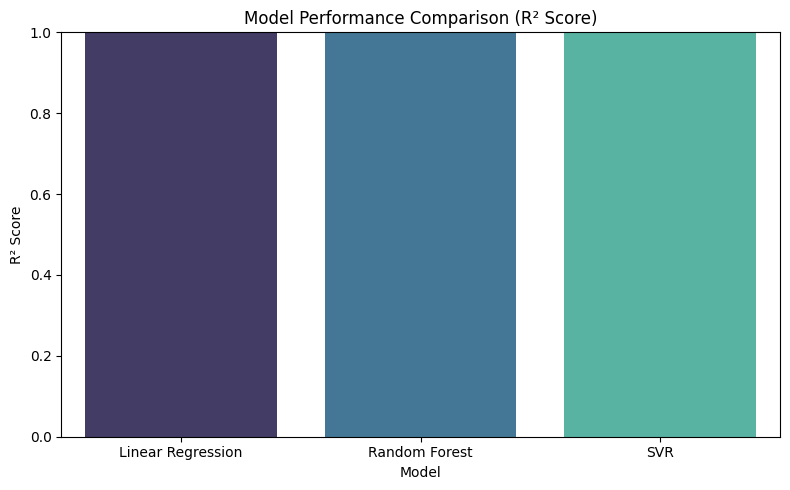


Statistical Analysis (Skewness & Kurtosis):


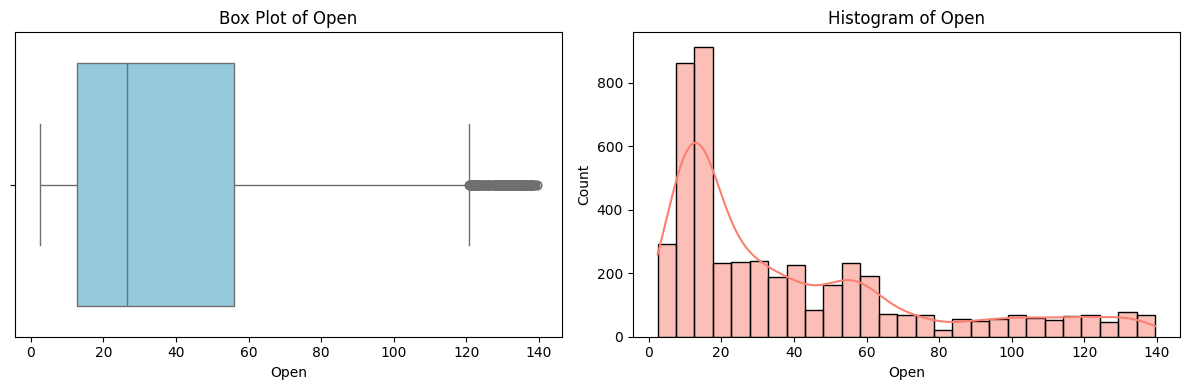

Open: Skewness = 1.27, Kurtosis = 0.59


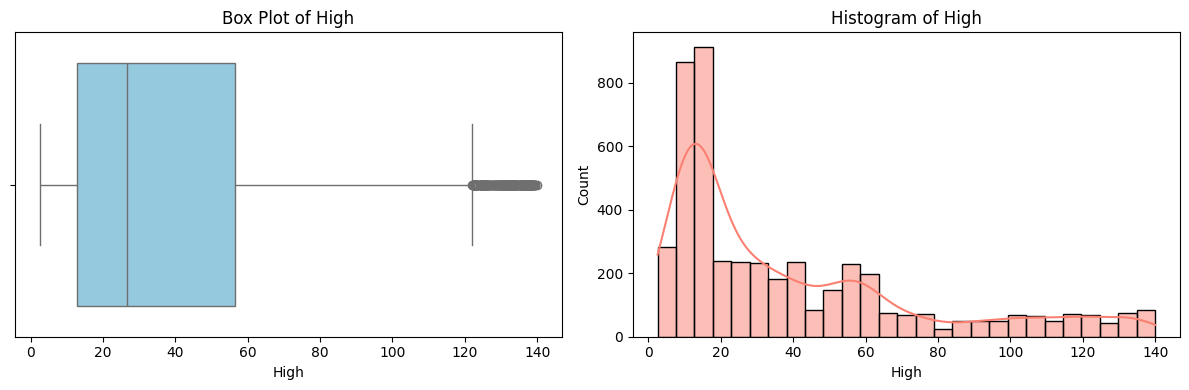

High: Skewness = 1.27, Kurtosis = 0.58


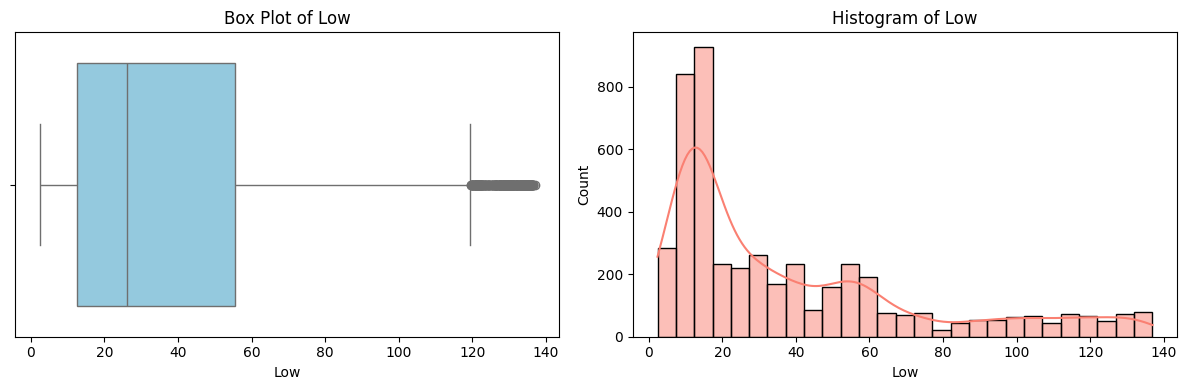

Low: Skewness = 1.26, Kurtosis = 0.58


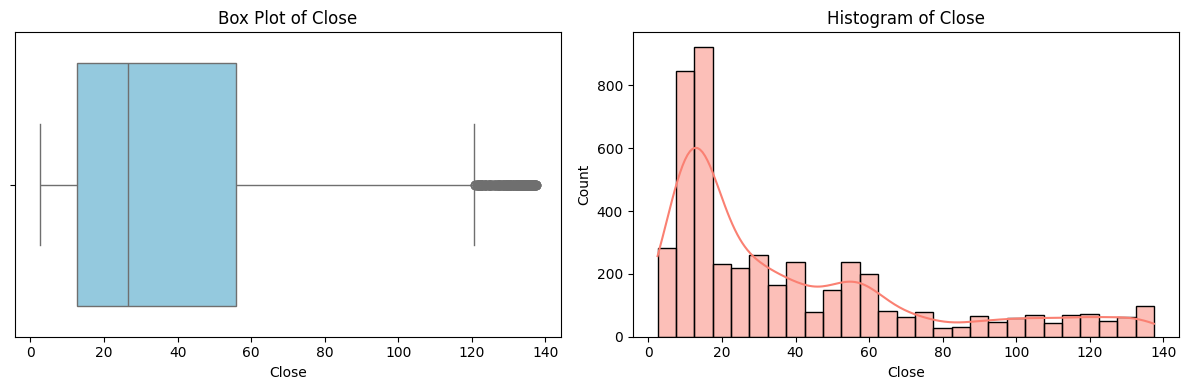

Close: Skewness = 1.27, Kurtosis = 0.58


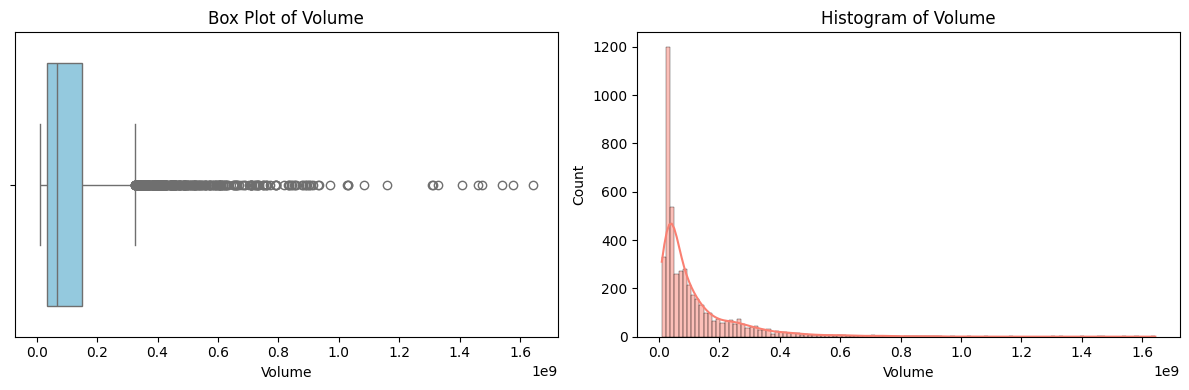

Volume: Skewness = 3.34, Kurtosis = 17.47
T-Test: t-statistic = -1.412, p-value = 0.159
Z-Test: z-statistic = 0.000, p-value = 1.000
ANOVA: F-statistic = 0.653, p-value = 0.520


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For regression modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from scipy import stats
from statsmodels.stats.weightstats import ztest
# --------------------------
# 1. Load and Preprocess Data
# --------------------------

# Load the dataset (ensure the file name matches your uploaded file)
df = pd.read_csv("/content/GOOGL_2004-08-01_2024-12-18.csv")

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Convert Date column to datetime and sort the data by Date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# --------------------------
# 2. Data Visualization (Initial Plots for Close Price)
# --------------------------

# Scatter Plot: Date vs Close
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Close'], alpha=0.5, color='blue')
plt.title("Scatter Plot: Date vs Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time Series Plot: Date vs Close (line plot)
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], color='green')
plt.title("Time Series Plot: Date vs Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box Plot for Close Price
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Close'], color='orange')
plt.title("Box Plot of Close Price")
plt.tight_layout()
plt.show()

# Histogram for Close Price
plt.figure(figsize=(6, 4))
sns.histplot(df['Close'], kde=True, color='purple')
plt.title("Histogram of Close Price")
plt.tight_layout()
plt.show()


# 3. Remove Outliers (IQR method for 'Close' price)


# Calculate Q1, Q3, and IQR for the Close price
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_clean = df[(df['Close'] >= lower_bound) & (df['Close'] <= upper_bound)]
print("\nDataset shape before outlier removal:", df.shape)
print("Dataset shape after outlier removal:", df_clean.shape)


# 4. Model Training


features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Drop any missing values in the selected features and target
df_clean = df_clean.dropna(subset=features + [target])

X = df_clean[features]
y = df_clean[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

# --- Model 2: Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

# --- Model 3: Support Vector Regressor (SVR) ---
# SVR requires scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the performance metrics
print("\nModel Performance (R² Score):")
print("Linear Regression R²:", r2_lr)
print("Random Forest Regressor R²:", r2_rf)
print("SVR R²:", r2_svr)


# 5. Plot Model Performance Comparison


model_names = ['Linear Regression', 'Random Forest', 'SVR']
r2_scores = [r2_lr, r2_rf, r2_svr]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=r2_scores, palette="mako")
plt.ylim(0, 1)
plt.title("Model Performance Comparison (R² Score)")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


# 6. Additional Analysis: Box Plots, Histograms, Skewness & Kurtosis for Every Numerical Column


# We'll consider the following numerical columns
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

print("\nStatistical Analysis (Skewness & Kurtosis):")
for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_clean[col], color='skyblue')
    plt.title(f"Box Plot of {col}")

    # Histogram with KDE
    plt.subplot(1, 2, 2)
    sns.histplot(df_clean[col], kde=True, color='salmon')
    plt.title(f"Histogram of {col}")

    plt.tight_layout()
    plt.show()

    # Compute and print skewness and kurtosis
    skew_val = df_clean[col].skew()
    kurt_val = df_clean[col].kurtosis()
    print(f"{col}: Skewness = {skew_val:.2f}, Kurtosis = {kurt_val:.2f}")

# T-Test (Comparing two random samples of Close price)
sample1, sample2 = df_clean['Close'].sample(100, random_state=42), df_clean['Close'].sample(100, random_state=21)
t_stat, p_val_t = stats.ttest_ind(sample1, sample2)
print(f"T-Test: t-statistic = {t_stat:.3f}, p-value = {p_val_t:.3f}")

# Z-Test (Close price sample vs population mean)
z_stat, p_val_z = ztest(df_clean['Close'], value=df_clean['Close'].mean())
print(f"Z-Test: z-statistic = {z_stat:.3f}, p-value = {p_val_z:.3f}")

# ANOVA (Testing mean differences between Open, High, and Low)
anova_stat, p_val_anova = stats.f_oneway(df_clean['Open'], df_clean['High'], df_clean['Low'])
print(f"ANOVA: F-statistic = {anova_stat:.3f}, p-value = {p_val_anova:.3f}")
